# Test Data Preprocessing

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test_df = pd.read_csv('/content/drive/MyDrive/Resume Projects/Lexis Nexis Project/flight_test.csv')

In [3]:
test_df.head()

,uniqueid,year,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,dest,hour,minute,time_hour,lateflight
0,1,2013,7,14,1440,1749,DL,1902,N965DL,LGA,PBI,14,40,2013-07-14 14:00:00,0.0
1,2,2013,7,7,945,1305,AA,1871,N3AJAA,LGA,MIA,9,45,2013-07-07 09:00:00,0.0
2,3,2013,7,5,1200,1435,DL,1947,N608DA,LGA,ATL,12,0,2013-07-05 12:00:00,0.0
3,4,2013,7,22,650,808,EV,5811,N16919,EWR,BUF,6,50,2013-07-22 06:00:00,1.0
4,5,2013,7,2,1630,1930,AA,881,N3FCAA,JFK,DFW,16,30,2013-07-02 16:00:00,1.0


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uniqueid        6000 non-null   int64  
 1   year            6000 non-null   int64  
 2   month           6000 non-null   int64  
 3   day             6000 non-null   int64  
 4   sched_dep_time  6000 non-null   int64  
 5   sched_arr_time  6000 non-null   int64  
 6   carrier         6000 non-null   object 
 7   flight          6000 non-null   int64  
 8   tailnum         5948 non-null   object 
 9   origin          6000 non-null   object 
 10  dest            6000 non-null   object 
 11  hour            6000 non-null   int64  
 12  minute          6000 non-null   int64  
 13  time_hour       6000 non-null   object 
 14  lateflight      5786 non-null   float64
dtypes: float64(1), int64(9), object(5)
memory usage: 703.2+ KB


In [5]:
# Check for duplicates
duplicates = test_df.duplicated()
test_df['Is duplicated'] = duplicates
test_df['Is duplicated'].value_counts()

False    6000
Name: Is duplicated, dtype: int64

There are no duplicates in the dataset.

In [6]:
test_df.drop(['Is duplicated'],axis =1, inplace = True)

# Data Preprocessing - Handling Missing Values

In [7]:
# Check for % missing values
missing = round(test_df.isnull().sum()/test_df.shape[0]*100,2)
missing

uniqueid          0.00
year              0.00
month             0.00
day               0.00
sched_dep_time    0.00
sched_arr_time    0.00
carrier           0.00
flight            0.00
tailnum           0.87
origin            0.00
dest              0.00
hour              0.00
minute            0.00
time_hour         0.00
lateflight        3.57
dtype: float64

<Axes: >

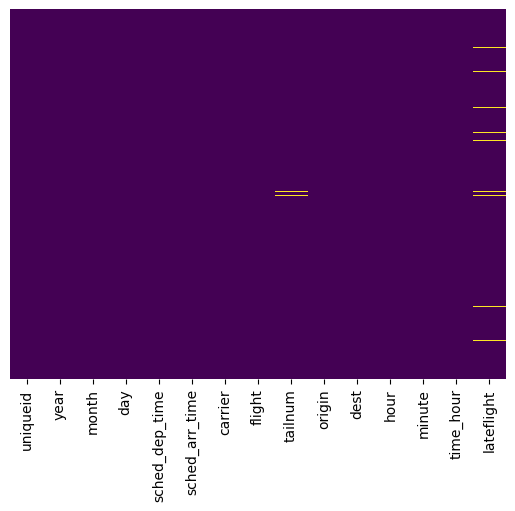

In [8]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
print('The no of missing values in lateflight is ',test_df.isnull().sum()['lateflight'], 'and % of missing values is',missing['lateflight'],'%')
print('The no of missing values in tailnum is ',test_df.isnull().sum()['tailnum'], 'and % of missing values is',missing['tailnum'],'%')

The no of missing values in lateflight is  214 and % of missing values is 3.57 %
The no of missing values in tailnum is  52 and % of missing values is 0.87 %


In [10]:
# Fill The missing values in tailnum with value ='Unknown'
test_df['tailnum'] = test_df['tailnum'].fillna('Unknown')

In [11]:
# Drop the rest 214 rows
test_df.dropna(inplace=True)

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5786 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uniqueid        5786 non-null   int64  
 1   year            5786 non-null   int64  
 2   month           5786 non-null   int64  
 3   day             5786 non-null   int64  
 4   sched_dep_time  5786 non-null   int64  
 5   sched_arr_time  5786 non-null   int64  
 6   carrier         5786 non-null   object 
 7   flight          5786 non-null   int64  
 8   tailnum         5786 non-null   object 
 9   origin          5786 non-null   object 
 10  dest            5786 non-null   object 
 11  hour            5786 non-null   int64  
 12  minute          5786 non-null   int64  
 13  time_hour       5786 non-null   object 
 14  lateflight      5786 non-null   float64
dtypes: float64(1), int64(9), object(5)
memory usage: 723.2+ KB


<Axes: >

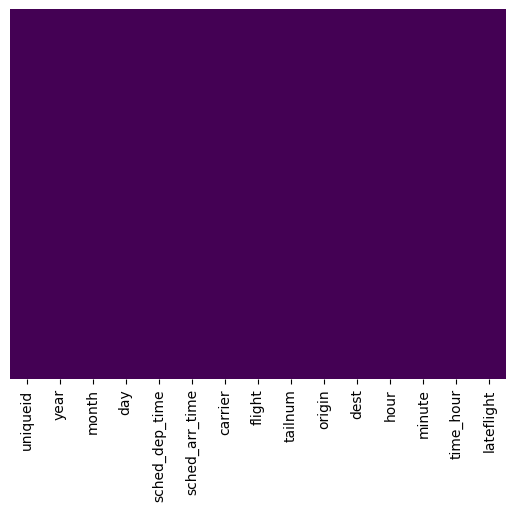

In [14]:
# Check for missing values again
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Check for outliers in the data

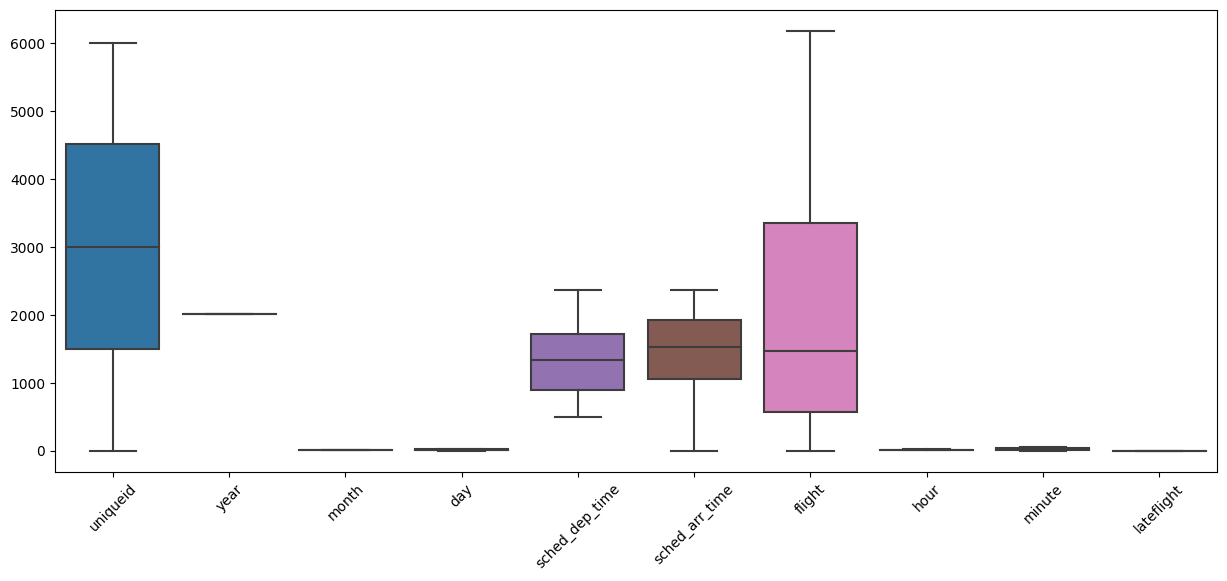

In [15]:
# Box plots for numerical columns
plt.figure(figsize=(15, 6))
sns.boxplot(data=test_df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

There are no outliers present in the data

# Handling Data type conversion

In [16]:
test_df['carrier'] = test_df['carrier'].astype('str')
test_df['flight'] = test_df['flight'].astype('str')
test_df['tailnum'] = test_df['tailnum'].astype('str')
test_df['origin'] = test_df['origin'].astype('str')
test_df['dest'] = test_df['dest'].astype('str')


In [17]:
test_df['time_hour'] = pd.to_datetime(test_df['time_hour'])
test_df['day_of_week'] = test_df['time_hour'].dt.strftime('%w').astype(int)

In [18]:
test_df.drop(['time_hour', 'year'], axis =1 , inplace = True)

In [19]:
test_df.drop(['uniqueid'], axis =1 , inplace = True)

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5786 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           5786 non-null   int64  
 1   day             5786 non-null   int64  
 2   sched_dep_time  5786 non-null   int64  
 3   sched_arr_time  5786 non-null   int64  
 4   carrier         5786 non-null   object 
 5   flight          5786 non-null   object 
 6   tailnum         5786 non-null   object 
 7   origin          5786 non-null   object 
 8   dest            5786 non-null   object 
 9   hour            5786 non-null   int64  
 10  minute          5786 non-null   int64  
 11  lateflight      5786 non-null   float64
 12  day_of_week     5786 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 632.8+ KB


In [21]:
test_df['lateflight'].value_counts()

0.0    3088
1.0    2698
Name: lateflight, dtype: int64

In [22]:
records = test_df.shape[0]
records

5786

# Exploratory Data Analysis and Feature Engineering

In [23]:
# Total Arrival Delays and On time Arrival %
print('Percentage of Arrival Delays is',round(test_df['lateflight'].value_counts()[1]/records*100,2),'%')
print('Percentage of On Time Arrivals is',round(test_df['lateflight'].value_counts()[0]/records*100,2),'%')

Percentage of Arrival Delays is 46.63 %
Percentage of On Time Arrivals is 53.37 %


<Axes: xlabel='lateflight', ylabel='count'>

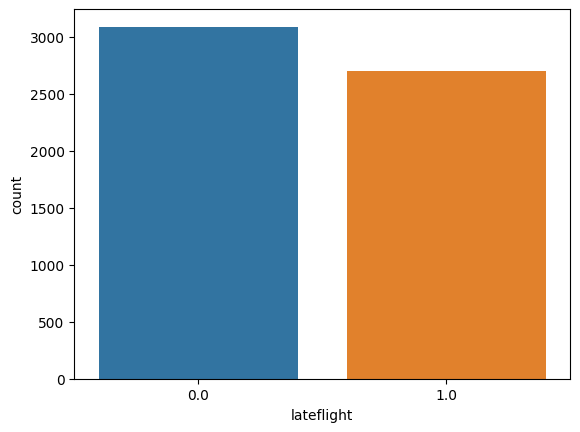

In [24]:
sns.countplot(x='lateflight',data=test_df)

In [26]:
history_data = pd.read_csv('/content/drive/MyDrive/Resume Projects/Lexis Nexis Project/history_flights.csv')
history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160137 entries, 0 to 160136
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   month            160137 non-null  int64  
 1   day              160137 non-null  int64  
 2   dep_time         160137 non-null  float64
 3   sched_dep_time   160137 non-null  int64  
 4   dep_delay        160137 non-null  int64  
 5   arr_time         160137 non-null  float64
 6   sched_arr_time   160137 non-null  int64  
 7   arr_delay        160137 non-null  int64  
 8   carrier          160137 non-null  object 
 9   flight           160137 non-null  float64
 10  tailnum          160137 non-null  object 
 11  origin           160137 non-null  object 
 12  dest             160137 non-null  object 
 13  air_time         160137 non-null  float64
 14  distance         160137 non-null  float64
 15  hour             160137 non-null  int64  
 16  minute           160137 non-null  int6

In [27]:
historical_dest_airports = set(history_data['dest'])

In [28]:
test_dest_airports = set(test_df['dest'])

In [29]:
# Find airports unique to historical data
unique_airports_in_historical = historical_dest_airports - test_dest_airports

# Find airports unique to test data
unique_airports_in_test = test_dest_airports - historical_dest_airports

# Display the results
print("Airports unique to historical data:", unique_airports_in_historical)
print("Airports unique to test data:", unique_airports_in_test)

Airports unique to historical data: {'HDN', 'EGE', 'EYW', 'CRW', 'PSP', 'JAC', 'CHO', 'BDL', 'MTJ'}
Airports unique to test data: {'ANC'}


# Flight Numbers unique to test data

In [30]:
historical_flightnum = set(history_data['flight'])
test_flightnum = set(test_df['flight'])

# Find flight unique to historical data
unique_flight_in_historical = historical_flightnum - test_flightnum

# Find flight unique to test data
unique_flight_in_test = test_flightnum - historical_flightnum

# Display the results
print("flight unique to historical data:", unique_flight_in_historical)
print("flight unique to test data:", unique_flight_in_test)
print('No of Unique Flight Num in Test Data',len(unique_flight_in_test))

flight unique to historical data: {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 59.0, 61.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 79.0, 80.0, 81.0, 83.0, 84.0, 85.0, 86.0, 87.0, 89.0, 90.0, 91.0, 94.0, 95.0, 96.0, 97.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 108.0, 109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 122.0, 123.0, 124.0, 125.0, 127.0, 128.0, 130.0, 132.0, 133.0, 135.0, 137.0, 139.0, 140.0, 141.0, 142.0, 143.0, 145.0, 147.0, 148.0, 149.0, 151.0, 152.0, 153.0, 155.0, 157.0, 161.0, 162.0, 163.0, 164.0, 165.0, 167.0, 168.0, 169.0, 171.0, 173.0, 175.0, 177.0, 179.0, 180.0, 181.0, 183.0, 184.0, 185.0, 186.0, 187.0, 189.0, 190.0, 193.0, 1

# Tail Num unique to test data

In [31]:
historical_tailnum = set(history_data['tailnum'])
test_tailnum = set(test_df['tailnum'])

# Find flight unique to historical data
unique_tailnum_in_historical = historical_tailnum - test_tailnum

# Find flight unique to test data
unique_tailnum_in_test = test_tailnum - historical_tailnum

# Display the results
print("tailnum unique to historical data:", unique_tailnum_in_historical)
print("tailnum unique to test data:", unique_tailnum_in_test)
print('No of Unique tailnum in Test Data',len(unique_tailnum_in_test))

tailnum unique to historical data: {'N917DL', 'N27190', 'N813MQ', 'N962WN', 'N586AS', 'N7746C', 'N680AW', 'N176AT', 'N438AA', 'N374SW', 'N655MQ', 'N533US', 'N3DGAA', 'N932MQ', 'N532US', 'N569AS', 'N13161', 'N360SW', 'N505SW', 'N3FNAA', 'N765US', 'N624AA', 'N109UW', 'N931MQ', 'N14629', 'N538AS', 'N77865', 'N8923A', 'N685MQ', 'N4WLAA', 'N844UA', 'N450UW', 'N583AA', 'N16065', 'N577AS', 'N1610D', 'N513AS', 'N8884E', 'N784NC', 'N568AS', 'N725SW', 'N373SW', 'N32626', 'N583AS', 'N804MQ', 'N57864', 'N935AT', 'N62631', 'N959DN', 'N8986B', 'N305AS', 'N719MQ', 'N364SW', 'N222WN', 'N8516C', 'N951DL', 'N661DN', 'N818MQ', 'N439UA', 'N905DA', 'N13113', 'N512AS', 'N474UA', 'N5FBAA', 'N8416B', 'N352SW', 'N69154', 'N274WN', 'N551WN', 'N916FJ', 'N677AW', 'N181UW', 'N671MQ', 'N660UA', 'N250WN', 'N907MQ', 'N394SW', 'N454WN', 'N76065', 'N340LV', 'N690DL', 'N909FJ', 'N605LR', 'N509AA', 'N522SW', 'N675DL', 'N608AT', 'N819MQ', 'N17133', 'N8888D', 'N382AA', 'N612AA', 'N407AS', 'N501US', 'N345SA', 'N515SW', 'N3E

In [32]:
# UNIQUE COMBINATIONS OF ORIGIN AND DEST

# Assuming df_history is your historical DataFrame and df_test is your test DataFrame
# Assuming 'flight' and 'tailnum' are the columns of interest

# Find unique combinations in history but not in test
unique_combinations_history = history_data[['origin', 'dest']].drop_duplicates()
unique_combinations_test = test_df[['origin', 'dest']].drop_duplicates()

unique_combinations_only_in_history = unique_combinations_history[~unique_combinations_history.isin(unique_combinations_test)].dropna()

# Find unique combinations in test but not in history
unique_combinations_only_in_test = unique_combinations_test[~unique_combinations_test.isin(unique_combinations_history)].dropna()

# Display the results
print("Unique combinations in history but not in test:")
print(unique_combinations_only_in_history)

print("\nUnique combinations in test but not in history:")
print(unique_combinations_only_in_test)


Unique combinations in history but not in test:
       origin dest
0         EWR  IAH
2         JFK  MIA
3         JFK  BQN
4         LGA  ATL
5         EWR  ORD
...       ...  ...
128181    LGA  IND
133882    LGA  HOU
141845    LGA  DSM
145405    LGA  TVC
146128    LGA  MYR

[191 rows x 2 columns]

Unique combinations in test but not in history:
     origin dest
0       LGA  PBI
2       LGA  ATL
3       EWR  BUF
4       JFK  DFW
5       LGA  PHL
...     ...  ...
2574    EWR  TYS
3364    EWR  BZN
3575    LGA  CAE
5163    LGA  MYR
5487    EWR  PVD

[169 rows x 2 columns]


In [ ]:
# UNIQUE COMBINATIONS OF CARRIER, DEST, ORIGIN

# Assuming df_history is your historical DataFrame and df_test is your test DataFrame
# Assuming 'flight' and 'tailnum' are the columns of interest

# Find unique combinations in history but not in test
unique_combinations_history = history_data[['carrier', 'origin','dest']].drop_duplicates()
unique_combinations_test = test_df[['carrier', 'origin','dest']].drop_duplicates()

unique_combinations_only_in_history = unique_combinations_history[~unique_combinations_history.isin(unique_combinations_test)].dropna()

# Find unique combinations in test but not in history
unique_combinations_only_in_test = unique_combinations_test[~unique_combinations_test.isin(unique_combinations_history)].dropna()

# Display the results
print("Unique combinations in history but not in test:")
print(unique_combinations_only_in_history)

print("\nUnique combinations in test but not in history:")
print(unique_combinations_only_in_test)


Unique combinations in history but not in test:
       carrier origin dest
0           UA    EWR  IAH
2           AA    JFK  MIA
3           B6    JFK  BQN
4           DL    LGA  ATL
5           UA    EWR  ORD
...        ...    ...  ...
145405      MQ    LGA  TVC
145962      9E    LGA  BTV
146128      EV    LGA  MYR
146187      OO    EWR  DTW
152183      EV    LGA  TVC

[329 rows x 3 columns]

Unique combinations in test but not in history:
     carrier origin dest
0         DL    LGA  PBI
2         DL    LGA  ATL
3         EV    EWR  BUF
4         AA    JFK  DFW
5         US    LGA  PHL
...      ...    ...  ...
3650      MQ    JFK  BWI
3880      EV    LGA  CLE
4153      DL    JFK  PIT
5163      EV    LGA  MYR
5487      EV    EWR  PVD

[255 rows x 3 columns]


In [ ]:
high_priority_features = ['day', 'sched_dep_time', 'sched_arr_time', 'duration',
       'tail_delay_percent', 'tail_arr_delay', 'Carr_Dest_Arrival_delay',
       'Carr_Day_Arrival_delay', 'flight_encoded', 'tailnum_encoded']

# Appending Meta Variables into Test Data set from History data

In [33]:
# TAILNUM FEATURES
tailnum_delay_rate = history_data.groupby('tailnum')['lateflight'].mean().reset_index(name='tail_delay_percent')
tailnum_delay_rate['tail_delay_percent'] = round(tailnum_delay_rate['tail_delay_percent']*100,2)
tailnum_delay_rate = tailnum_delay_rate.sort_values(by='tail_delay_percent',ascending=False)
tailnum_delay_rate

,tailnum,tail_delay_percent
1785,N519AS,100.0
2544,N663UA,100.0
2269,N606SW,100.0
2395,N634SW,100.0
2813,N73860,100.0
...,...,...
2366,N628SW,0.0
2378,N631AW,0.0
3582,N929LR,0.0
3581,N929DN,0.0


In [34]:
test_df['duration'] = test_df['sched_arr_time'] - test_df['sched_dep_time']

In [35]:
# FLIGHT TAILNUM Arrival Delay Rate
tailnum_arr_delay_rate = history_data.groupby('tailnum')['arr_delay'].mean().reset_index(name='tail_arr_delay')
tailnum_arr_delay_rate = tailnum_arr_delay_rate.sort_values(by='tail_arr_delay',ascending=False)
tailnum_arr_delay_rate

,tailnum,tail_arr_delay
2343,N624AW,53.0
2467,N648UA,53.0
1824,N524SW,52.0
3523,N919FJ,49.0
3587,N930LR,46.0
...,...,...
317,N172DZ,-31.0
1935,N546AS,-31.3
362,N182DN,-34.0
3497,N915DN,-39.0


In [36]:
# Combine Tailnum Info
tailnum_info = pd.merge(tailnum_delay_rate,tailnum_arr_delay_rate,how='left', on=['tailnum'])
tailnum_info

,tailnum,tail_delay_percent,tail_arr_delay
0,N519AS,100.0,15.5
1,N663UA,100.0,23.0
2,N606SW,100.0,3.0
3,N634SW,100.0,7.0
4,N73860,100.0,20.0
...,...,...,...
3813,N628SW,0.0,-7.0
3814,N631AW,0.0,-8.0
3815,N929LR,0.0,-10.5
3816,N929DN,0.0,-8.0


In [37]:
# Carrier Destination Arrival Delay Percentage
carrier_dest_arr_delay= history_data.groupby(['carrier','dest'])['lateflight'].mean().reset_index(name = 'Carr_Dest_Arrival_delay')
carrier_dest_arr_delay['Carr_Dest_Arrival_delay'] = round(carrier_dest_arr_delay['Carr_Dest_Arrival_delay']*100,2)
carrier_dest_arr_delay = carrier_dest_arr_delay.sort_values(by='Carr_Dest_Arrival_delay',ascending=False)
carrier_dest_arr_delay

,carrier,dest,Carr_Dest_Arrival_delay
226,UA,CLT,100.00
178,EV,PBI,66.67
148,EV,CAE,52.94
44,AA,IAH,52.27
39,AA,AUS,51.45
...,...,...,...
23,9E,MHT,0.00
111,DL,IND,0.00
5,9E,BTV,0.00
104,DL,BUF,0.00


In [38]:
# CARRIER DAY OF WEEK ARRIVAL DELAY PERCENTAGE
carrier_Day_arr_delay= history_data.groupby(['carrier','day_of_week'])['lateflight'].mean().reset_index(name = 'Carr_Day_Arrival_delay')
carrier_Day_arr_delay['Carr_Day_Arrival_delay'] = round(carrier_Day_arr_delay['Carr_Day_Arrival_delay']*100,2)
carrier_Day_arr_delay = carrier_Day_arr_delay.sort_values(by='Carr_Day_Arrival_delay',ascending=False)
carrier_Day_arr_delay

,carrier,day_of_week,Carr_Day_Arrival_delay
44,F9,2,54.00
52,FL,3,49.81
53,FL,4,47.74
51,FL,2,45.76
45,F9,3,45.10
...,...,...,...
62,HA,6,11.54
20,AS,6,5.88
71,OO,6,0.00
70,OO,3,0.00


# Join the Features with the test data

In [39]:
test_df = pd.merge(test_df,tailnum_info,how='left',on='tailnum')
test_df = pd.merge(test_df,carrier_dest_arr_delay,how='left',on=['carrier','dest'])
test_df = pd.merge(test_df,carrier_Day_arr_delay,how='left',on=['carrier','day_of_week'])
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5786 entries, 0 to 5785
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    5786 non-null   int64  
 1   day                      5786 non-null   int64  
 2   sched_dep_time           5786 non-null   int64  
 3   sched_arr_time           5786 non-null   int64  
 4   carrier                  5786 non-null   object 
 5   flight                   5786 non-null   object 
 6   tailnum                  5786 non-null   object 
 7   origin                   5786 non-null   object 
 8   dest                     5786 non-null   object 
 9   hour                     5786 non-null   int64  
 10  minute                   5786 non-null   int64  
 11  lateflight               5786 non-null   float64
 12  day_of_week              5786 non-null   int64  
 13  duration                 5786 non-null   int64  
 14  tail_delay_percent      

### CHECK FOR MISSING VALUES AFTER ADDING THE FEATURES TO TEST DATA

In [40]:
test_df.isnull().sum()

month                       0
day                         0
sched_dep_time              0
sched_arr_time              0
carrier                     0
flight                      0
tailnum                     0
origin                      0
dest                        0
hour                        0
minute                      0
lateflight                  0
day_of_week                 0
duration                    0
tail_delay_percent         35
tail_arr_delay             35
Carr_Dest_Arrival_delay     3
Carr_Day_Arrival_delay      0
dtype: int64


There are 35 missing values each in tail_delay_percent and tail_arr_delay and 3 missing values in Carr_Dest_Arrival_delay.

We already know that there were 12 unique tailnumbers with 35 records count in Test data and 1 destination with 3 records.

I am going to impute the missing values by the mean of the respective columns.





In [41]:
test_df['Carr_Dest_Arrival_delay'] = test_df['Carr_Dest_Arrival_delay'].fillna(value=test_df['Carr_Dest_Arrival_delay'].mean())

In [ ]:
test_df['tail_arr_delay'] = test_df['tail_arr_delay'].fillna(value=test_df['tail_arr_delay'].mean())

In [42]:
test_df['tail_delay_percent'] = test_df['tail_delay_percent'].fillna(value=test_df['tail_delay_percent'].mean())

### CHECK FOR MISSING VALUES

In [43]:
test_df.isnull().sum()

month                       0
day                         0
sched_dep_time              0
sched_arr_time              0
carrier                     0
flight                      0
tailnum                     0
origin                      0
dest                        0
hour                        0
minute                      0
lateflight                  0
day_of_week                 0
duration                    0
tail_delay_percent          0
tail_arr_delay             35
Carr_Dest_Arrival_delay     0
Carr_Day_Arrival_delay      0
dtype: int64

### CATEGORICAL ENCODING

In [44]:
# Fields with Object or string data type
object_type_cols = [col for col in test_df.columns if test_df[col].dtype == 'O']
object_type_cols

['carrier', 'flight', 'tailnum', 'origin', 'dest']

In [46]:
high_priority_features = ['day', 'sched_dep_time', 'sched_arr_time', 'duration',
       'tail_delay_percent', 'tail_arr_delay', 'Carr_Dest_Arrival_delay',
       'Carr_Day_Arrival_delay', 'flight_encoded', 'tailnum_encoded']

In [47]:
# No of Unique features in each Object Fields
print('The number of unique features in carrier are',test_df['carrier'].nunique())
print('The number of unique features in flight are',test_df['flight'].nunique())
print('The number of unique features in tailnum are',test_df['tailnum'].nunique())
print('The number of unique features in origin are',test_df['origin'].nunique())
print('The number of unique features in dest are',test_df['dest'].nunique())

The number of unique features in carrier are 15
The number of unique features in flight are 1161
The number of unique features in tailnum are 2210
The number of unique features in origin are 3
The number of unique features in dest are 92


In [48]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [49]:
# TARGET ENCODING FOR FLIGHT COLUMN
import category_encoders as ce

# Create a target encoder instance
target_encoder = ce.TargetEncoder(cols=['flight'],smoothing=1.0)

# Fit and transform the data using the target encoder
test_df_encoded = target_encoder.fit_transform(test_df['flight'], test_df['lateflight'])

# Rename the target-encoded column with a suffix
suffix = '_encoded'
test_df_encoded.rename(columns={'flight': f'flight{suffix}'}, inplace=True)

# Merge the encoded values back to the original DataFrame
test_df = pd.concat([test_df, test_df_encoded], axis=1)

# Display the DataFrame with the target-encoded values
test_df.head(1)


,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,dest,hour,minute,lateflight,day_of_week,duration,tail_delay_percent,tail_arr_delay,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded
0,7,14,1440,1749,DL,1902,N965DL,LGA,PBI,14,40,0.0,0,309,20.0,-7.333333,32.34,22.24,0.466298


In [50]:
# TARGET ENCODING FOR FLIGHT COLUMN
import category_encoders as ce

# Create a target encoder instance
target_encoder = ce.TargetEncoder(cols=['tailnum'],smoothing=1.0)

# Fit and transform the data using the target encoder
test_df_encoded = target_encoder.fit_transform(test_df['tailnum'], test_df['lateflight'])

# Rename the target-encoded column with a suffix
suffix = '_encoded'
test_df_encoded.rename(columns={'tailnum': f'tailnum{suffix}'}, inplace=True)

# Merge the encoded values back to the original DataFrame
test_df = pd.concat([test_df, test_df_encoded], axis=1)

# Display the DataFrame with the target-encoded values
test_df.head(1)

,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,dest,hour,minute,lateflight,day_of_week,duration,tail_delay_percent,tail_arr_delay,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded
0,7,14,1440,1749,DL,1902,N965DL,LGA,PBI,14,40,0.0,0,309,20.0,-7.333333,32.34,22.24,0.466298,0.466298


In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5786 entries, 0 to 5785
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    5786 non-null   int64  
 1   day                      5786 non-null   int64  
 2   sched_dep_time           5786 non-null   int64  
 3   sched_arr_time           5786 non-null   int64  
 4   carrier                  5786 non-null   object 
 5   flight                   5786 non-null   object 
 6   tailnum                  5786 non-null   object 
 7   origin                   5786 non-null   object 
 8   dest                     5786 non-null   object 
 9   hour                     5786 non-null   int64  
 10  minute                   5786 non-null   int64  
 11  lateflight               5786 non-null   float64
 12  day_of_week              5786 non-null   int64  
 13  duration                 5786 non-null   int64  
 14  tail_delay_percent      

In [52]:
test_feature_df = test_df[high_priority_features]

### Feature Test Dataset

In [53]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5786 entries, 0 to 5785
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      5786 non-null   int64  
 1   sched_dep_time           5786 non-null   int64  
 2   sched_arr_time           5786 non-null   int64  
 3   duration                 5786 non-null   int64  
 4   tail_delay_percent       5786 non-null   float64
 5   tail_arr_delay           5751 non-null   float64
 6   Carr_Dest_Arrival_delay  5786 non-null   float64
 7   Carr_Day_Arrival_delay   5786 non-null   float64
 8   flight_encoded           5786 non-null   float64
 9   tailnum_encoded          5786 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 497.2 KB


In [54]:
# STANDARDISE THE DATASET
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

# Standardize all columns in the DataFrame
test_feature_df_standardized = scaler.fit_transform(test_feature_df)

# Create a new DataFrame with the standardized values
test_feature_df_standardized = pd.DataFrame(test_feature_df_standardized, columns=test_feature_df.columns)

# Now, test_feature_df_standardized contains the standardized values for all columns


In [56]:
test_feature_df_standardized

,day,sched_dep_time,sched_arr_time,duration,tail_delay_percent,tail_arr_delay,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded
0,-0.246726,0.233436,0.484650,0.370460,-1.033053,-0.518335,0.524598,-1.570895,-0.035781,-0.037562
1,-1.029439,-0.808707,-0.373878,0.505640,0.459048,0.231867,-0.525564,-2.126651,-0.035781,-0.037596
2,-1.253072,-0.271845,-0.122507,0.174317,0.925819,0.943308,0.336534,-0.468310,-0.035547,-0.037596
3,0.647803,-1.429782,-1.334889,-0.029778,0.578819,1.285910,-0.470643,0.875326,-0.035792,-0.037403
4,-1.588520,0.633451,0.834636,0.346605,1.392590,0.987070,-0.888378,-0.865598,-0.035800,-0.037563
...,...,...,...,...,...,...,...,...,...,...
5781,-0.582175,-1.305567,-1.042912,0.214076,-0.530462,-0.954166,0.536248,0.511517,-0.035775,-0.037609
5782,-0.023094,0.022902,0.022514,0.002029,-3.271763,-1.348558,0.276620,1.140928,-0.035814,-0.037563
5783,0.424171,-0.808707,-0.743200,-0.000622,-0.473375,-0.568348,-1.544105,-1.582055,-0.035777,-0.037647
5784,-1.141256,1.265053,1.082140,-0.109296,0.004590,0.655762,0.364827,-0.995051,-0.035775,-0.037927


In [57]:
final_test_df = pd.concat([test_feature_df_standardized, test_df['lateflight']], axis=1)


In [58]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      5786 non-null   float64
 1   sched_dep_time           5786 non-null   float64
 2   sched_arr_time           5786 non-null   float64
 3   duration                 5786 non-null   float64
 4   tail_delay_percent       5786 non-null   float64
 5   tail_arr_delay           5751 non-null   float64
 6   Carr_Dest_Arrival_delay  5786 non-null   float64
 7   Carr_Day_Arrival_delay   5786 non-null   float64
 8   flight_encoded           5786 non-null   float64
 9   tailnum_encoded          5786 non-null   float64
 10  lateflight               5786 non-null   float64
dtypes: float64(11)
memory usage: 497.4 KB


In [ ]:
#  save final_test_df to csv

final_test_df.to_csv('final_test_df.csv',index=False)
